## Decon using RedLionFish library

Works fine for small 3D arrays, but takes an extremely long time for large arrays

In [1]:
import RedLionfishDeconv as rl
from aicsimageio import AICSImage
from skimage.io import imread 
import numpy as np 
import logging
logging.basicConfig(level=logging.INFO)


In [37]:
psf_1 = imread("../sample_data/psfs/zeiss_simulated/488.tif")
print(psf_1.shape)

(93, 205, 205)


In [3]:
import napari
napari.view_image(psf_1)

c:\Users\deepu\Anaconda3\envs\napari_lattice\lib\site-packages\napari_tools_menu\__init__.py:194: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


Viewer(axes=Axes(visible=False, labels=True, colored=True, dashed=False, arrows=True), camera=Camera(center=(0.0, 102.0, 102.0), zoom=1.8907317073170729, angles=(0.0, 0.0, 90.0), perspective=0.0, interactive=True), cursor=Cursor(position=(1.0, 1.0, 0.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=3, ndisplay=2, last_used=0, range=((0.0, 93.0, 1.0), (0.0, 205.0, 1.0), (0.0, 205.0, 1.0)), current_step=(46, 102, 102), order=(0, 1, 2), axis_labels=('0', '1', '2')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Image layer 'psf_1' at 0x1f1242b5a90>], scale_bar=ScaleBar(visible=False, colored=False, ticks=True, position=<Position.BOTTOM_RIGHT: 'bottom_right'>, font_size=10, unit=None), text_overlay=TextOverlay(visible=False, color=(0.5, 0.5, 0.5, 1.0), font_size=10, position=<TextOverlayPosition.TOP_LEFT: 'top_left'>, text=''), overlays=Overlays(interaction_box=InteractionBox(points=None, show=False, show_handle=False, show_vertices=Fa

In [41]:
psf_binary = psf_1[psf_1>0.0]
psf_binary.min()

7.488046e-26

Text(0.5, 1.0, 'YZ')

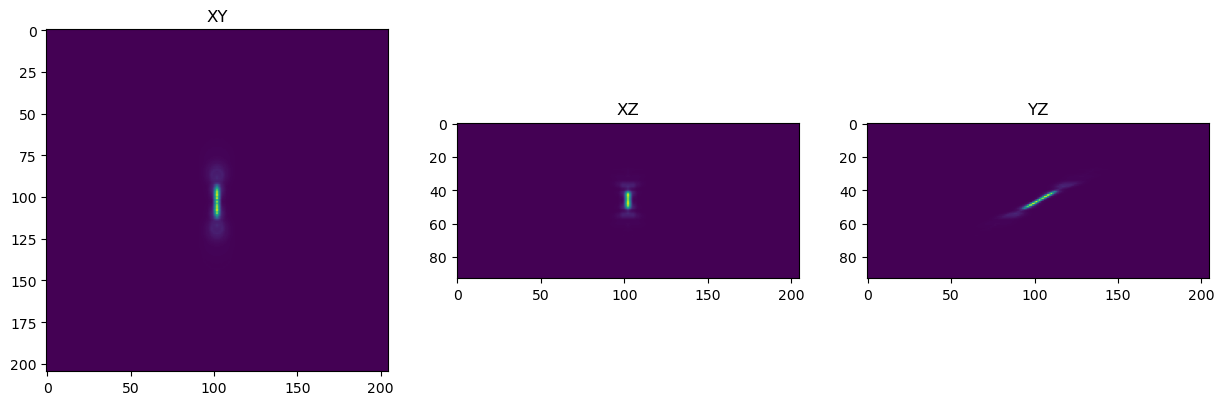

In [45]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,3, figsize=(15,8))

psf_1_max_xy = np.max(psf_1,axis=0)
psf_1_max_xz = np.max(psf_1,axis=1)
psf_1_max_yz = np.max(psf_1,axis=2)

ax[0].imshow(psf_1_max_xy)
ax[0].set_title("XY")
ax[1].imshow(psf_1_max_xz)
ax[1].set_title("XZ")
ax[2].imshow(psf_1_max_yz)
ax[2].set_title("YZ")


In [ ]:
fig, ax = plt.subplots(1,3, figsize=(15,8))

psf_1_max_xy = np.max(psf_1,axis=0)
psf_1_max_xz = np.max(psf_1,axis=1)
psf_1_max_yz = np.max(psf_1,axis=2)

ax[0].imshow(psf_1_max_xy)
ax[0].set_title("XY")
ax[1].imshow(psf_1_max_xz)
ax[1].set_title("XZ")
ax[2].imshow(psf_1_max_yz)
ax[2].set_title("YZ")

Text(0.5, 1.0, 'YZ')

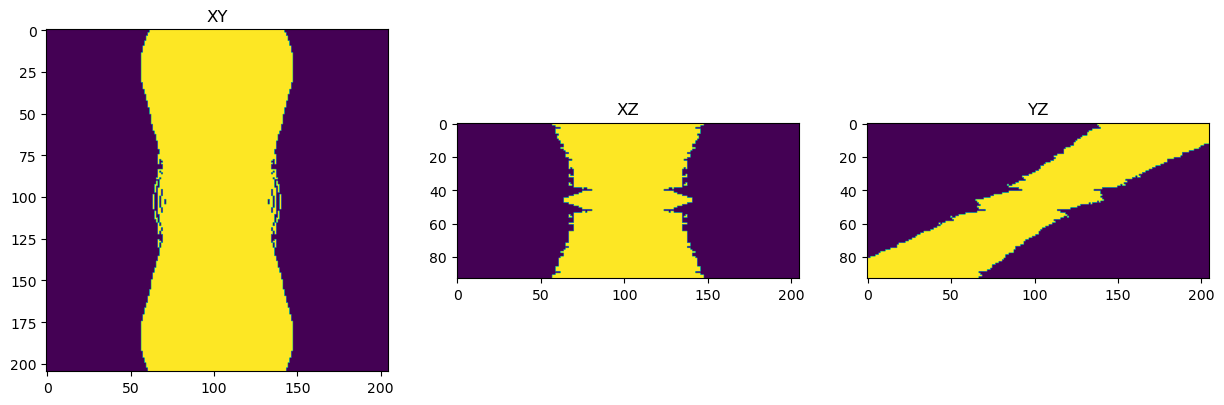

In [54]:
psf_binary = psf_1>0.00001


psf_1_max_bin_xy = np.max(psf_binary,axis=0)
psf_1_max_bin_xz = np.max(psf_binary,axis=1)
psf_1_max_bin_yz = np.max(psf_binary,axis=2)


fig, ax = plt.subplots(1,3, figsize=(15,8))
ax[0].imshow(psf_1_max_bin_xy,vmin=0,vmax=1)
ax[0].set_title("XY")
ax[1].imshow(psf_1_max_bin_xz,vmin=0,vmax=1)
ax[1].set_title("XZ")
ax[2].imshow(psf_1_max_bin_yz,vmin=0,vmax=1)
ax[2].set_title("YZ")


In [36]:
psf_1.min()

0.0

In [31]:
import RedLionfishDeconv.helperfunctions as rlh
test = rlh.change3DSizeTo(psf_1, (50,100,100))
test.shape

(50, 100, 100)

In [49]:
import napari 
viewer = napari.Viewer()
viewer.add_image(test)
viewer.add_image(psf_1)
viewer.add_image(psf_binary)

c:\Users\deepu\Anaconda3\envs\napari_lattice\lib\site-packages\napari_tools_menu\__init__.py:194: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


<Image layer 'psf_binary' at 0x1f13aeceaf0>

## Trying RL Decon option on a larger dataset. 

This can be downloaded from: https://cloudstor.aarnet.edu.au/plus/s/JerHyB7hAIOXiZw

In [3]:
#Can also optionally generate a numpy array of shape (834,300,2048) for testing purposes
img_large = AICSImage("RBC_full_time_series.czi")

img_large.dask_data

dask.array<transpose, shape=(3, 1, 834, 300, 2048), dtype=uint16, chunksize=(1, 1, 834, 300, 2048), chunktype=numpy.ndarray>

In [4]:
img_large_data = img_large.data[0,0,...]
print(img_large_data.shape)

(834, 300, 2048)


In [ ]:
img_large_data.dtype

In [19]:
img_decon_large= rl.doRLDeconvolutionFromNpArrays(data_np = img_large_data, 
                                                    psf_np = psf_1, 
                                                    niter= 10, 
                                                    method = "gpu")
print(img_decon_large.shape)
print(img_large_data.shape)

INFO:root:doRLDeconvolutionFromNpArrays(), niter=10 , method=gpu , useBlockAlgorithm=False, resAsUint8=False
INFO:root:Reikna package is available
INFO:root:Trying the OCL non-block RL deconvolution.
INFO:root:nonBlock_RLDeconvolutionReiknaOCL()
INFO:root:OCL device selected : <pyopencl.Device 'Quadro P4000' on 'NVIDIA CUDA' at 0x55f933cf9560>
INFO:root:Device params max_work_item_sizes: [1024, 1024, 64]
INFO:root:Shape (834, 300, 2048) is too large for OpenCL device shape limits [1024, 1024, 64]. But will try regardless.
INFO:root:setPSF()
INFO:root:change3DSizeTo() , shape:(834, 300, 2048)
INFO:root:nonBlock_RLDeconvolutionReiknaOCL() failed (GPU).
INFO:root:clEnqueueNDRangeKernel failed: MEM_OBJECT_ALLOCATION_FAILURE
INFO:root:Trying the OCL block RL deconvolution algorithm.
INFO:root:block_RLDeconv3DReiknaOCL() , data.shape:(834, 300, 2048), psfdata.shape:(93, 205, 205), max_dim_size:512, psfpaddingfract:1.2
INFO:root:data shape: (834, 300, 2048) , psf shape: (93, 205, 205)
INFO:ro

(834, 300, 2048)
(834, 300, 2048)


In [21]:
import napari
NV = napari.view_image(img_large_data, ndisplay=3)
NV.add_image(img_decon_large)

<Image layer 'img_decon_large' at 0x7f592df818e0>

  replacements made: ['viewtransformf', 'raycasting_setup', 'before_loop', 'in_loop', 'after_loop', 'sampler_type', 'post', 'pre', 'clip_with_planes', 'cmap', 'get_data']
  replacements made: ['viewtransformf', 'raycasting_setup', 'before_loop', 'in_loop', 'after_loop', 'sampler_type', 'post', 'pre', 'clip_with_planes', 'cmap', 'get_data']
Traceback (most recent call last):
  File "/ceph/users/ypu66991/conda_envs/dev/lib/python3.8/site-packages/vispy/app/backends/_qt.py", line 903, in paintGL
    self._vispy_canvas.events.draw(region=None)
  File "/ceph/users/ypu66991/conda_envs/dev/lib/python3.8/site-packages/vispy/util/event.py", line 453, in __call__
    self._invoke_callback(cb, event)
  File "/ceph/users/ypu66991/conda_envs/dev/lib/python3.8/site-packages/vispy/util/event.py", line 471, in _invoke_callback
    _handle_exception(self.ignore_callback_errors,
  File "/ceph/users/ypu66991/conda_envs/dev/lib/python3.8/site-packages/vispy/util/event.py", line 469, in _invoke_callback
  

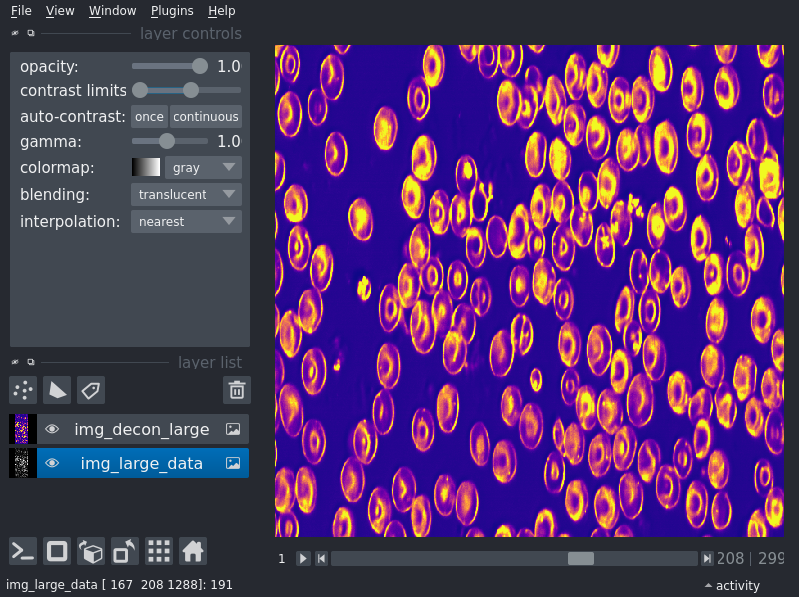

In [31]:
from napari.utils import nbscreenshot
nbscreenshot(NV)

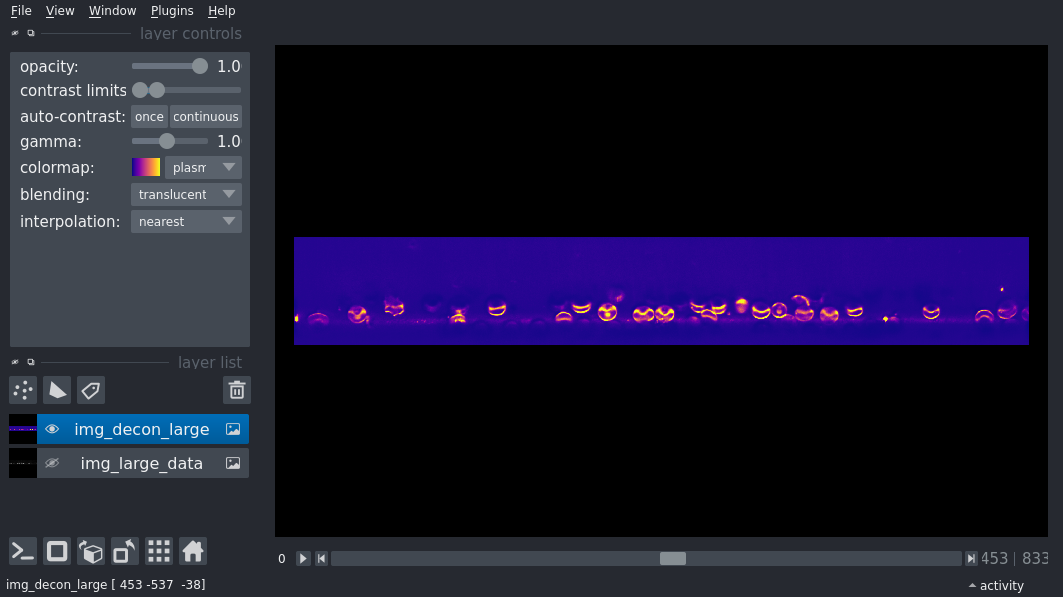

In [32]:
from napari.utils import nbscreenshot
nbscreenshot(NV)

In [23]:
import tifffile
tifffile.imsave("RBC_full_time_series_RedLionfish_10iter.tif", img_decon_large, compression='zlib')